In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer

In [4]:
import shap

In [190]:
sns.set(font_scale=(1.2), style='whitegrid', rc={'grid.linestyle':'--'})

# Открытие и изучение данных

In [5]:
train_data = pd.read_csv('NBKI_train.csv', index_col=0)
test_data = pd.read_csv('NBKI_test.csv', index_col=0)
y_test = pd.read_csv('NBKI_y_test.csv', index_col=0)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,default
48417,9,1,0,22,10,500000.0,75.0,75.0,3262,9.0,1.0,320500,3,3,5,7,8,11,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,3,0,0,0,1,10,24,17,7,12,4269811.0,177908,119009,3,2,3,3,4,5,5,0,0,1,1,1,2,423,1826,60,19,3262,19,0,0,0,0,0,0,0,0,430,333,5,3,0,0,0,61,40,2,1,0,0,0,0,0,13,1096,0.125000,0.00,0.011628,0.032787,1,0.0
109120,9,1,5,13,10,29983.0,22.0,22.0,2189,6.0,0.0,884426,1,3,7,17,26,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,4,11,7,4,5,491955.0,49195,37565,2,0,0,1,3,5,7,0,0,2,2,3,4,236,367,0,161,1459,247,0,0,0,0,0,0,0,0,147,123,3,2,0,0,0,53,46,0,0,0,0,0,1,0,3,123,0.181818,0.25,0.020408,0.000000,1,0.0
232425,9,1,0,15,10,730000.0,16.0,16.0,2863,8.0,1.0,208000,2,4,5,5,6,6,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,4,0,0,0,0,5,9,7,2,6,2272589.0,252509,171798,2,0,0,0,0,1,1,0,0,0,0,1,1,538,979,98,455,2860,1667,0,0,0,0,0,0,0,0,201,167,6,2,0,0,0,24,16,0,0,0,0,0,0,0,5,1826,0.222222,0.00,0.029851,0.000000,1,0.0
31393,7,1,0,8,10,0.0,68.0,68.0,6,0.0,0.0,0,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,498,0.000000,0.00,0.000000,0.000000,0,1.0
47064,1,1,0,22,10,901484.0,63.0,63.0,3708,10.0,0.0,1635500,8,15,15,17,23,27,3,3,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,2,6,8,0,0,0,15,0,0,0,2,7,23,20,3,20,1826926.0,83042,75247,3,1,2,2,4,8,11,0,1,2,4,7,9,283,993,31,23,3701,0,0,0,0,0,0,0,0,0,229,192,2,2,0,0,0,42,35,1,1,0,0,0,0,0,16,182,0.086957,0.00,0.008734,0.023810,1,0.0


In [8]:
train_data.shape

(30007, 134)

In [9]:
train_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30007 entries, 48417 to 19900
Data columns (total 134 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        30007 non-null  int64  
 1   1        30007 non-null  int64  
 2   2        30007 non-null  int64  
 3   3        30007 non-null  int64  
 4   4        30007 non-null  int64  
 5   5        30007 non-null  float64
 6   6        28819 non-null  float64
 7   7        28918 non-null  float64
 8   8        30007 non-null  int64  
 9   9        29938 non-null  float64
 10  10       29809 non-null  float64
 11  11       30007 non-null  int64  
 12  12       30007 non-null  int64  
 13  13       30007 non-null  int64  
 14  14       30007 non-null  int64  
 15  15       30007 non-null  int64  
 16  16       30007 non-null  int64  
 17  17       30007 non-null  int64  
 18  18       30007 non-null  int64  
 19  19       30007 non-null  int64  
 20  20       30007 non-null  int64  
 21  21     

В данных присутсвуют пропуски.

In [10]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132
400011,9,1,0,19,11,29748.0,54.0,54.0,17,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,0,2,42185.0,14061,14061,1,0,0,0,0,0,0,0,0,0,0,0,0,300,302,300,4464,5049,0,0,0,0,0,0,0,0,0,33,19,11,3,0,0,0,0,0,0,0,0,0,0,0,0,0,151,1.0,0.0,0.333333,0.0,1
367875,9,1,3,1,11,3000000.0,74.0,74.0,1147,3.0,0.0,19961974,10,15,16,18,24,37,3,4,0,0,3,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,2,5,0,0,0,0,0,0,0,0,6,4,0,0,11,4,0,0,7,4,12,10,2,8,11910983.0,992581,872098,4,1,3,4,7,8,11,2,2,5,8,9,10,262,543,39,17,1134,52,0,0,0,0,0,0,0,0,105,98,0,0,0,0,0,32,29,0,0,0,0,0,0,0,6,1825,0.0,0.0,0.000000,0.0,1
328952,9,1,1,6,11,40999.0,13.0,13.0,2944,8.0,0.0,100000,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,150000.0,150000,150000,1,0,0,0,0,0,0,0,0,0,0,0,0,897,897,897,2939,2939,0,0,0,0,0,0,0,0,0,37,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,731,0.0,0.0,0.000000,0.0,1
486218,9,1,0,19,11,5267.0,11.0,11.0,926,3.0,1.0,504947,8,8,8,18,18,18,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,1,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,8,0,0,0,0,2,2,1,1,1,28791.0,28791,0,2,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,251,251,0,0,0,0,0,0,0,0,0,14,8,0,0,0,0,0,9,7,0,0,0,0,0,0,0,0,365,0.0,0.0,0.000000,0.0,1
422556,7,1,3,8,11,144000.0,78.0,5.0,708,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,339,0.0,0.0,0.000000,0.0,0


In [11]:
test_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 400011 to 591853
Data columns (total 133 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       29993 non-null  int64  
 1   1       29993 non-null  int64  
 2   2       29993 non-null  int64  
 3   3       29993 non-null  int64  
 4   4       29993 non-null  int64  
 5   5       29993 non-null  float64
 6   6       28939 non-null  float64
 7   7       29026 non-null  float64
 8   8       29993 non-null  int64  
 9   9       29925 non-null  float64
 10  10      29809 non-null  float64
 11  11      29993 non-null  int64  
 12  12      29993 non-null  int64  
 13  13      29993 non-null  int64  
 14  14      29993 non-null  int64  
 15  15      29993 non-null  int64  
 16  16      29993 non-null  int64  
 17  17      29993 non-null  int64  
 18  18      29993 non-null  int64  
 19  19      29993 non-null  int64  
 20  20      29993 non-null  int64  
 21  21      29993 non-null  int6

В тестовых данных также присутсвуют пропуски. В тех же столбцах, что и в train.

In [12]:
y_test.head()

,default
400011,0.0
367875,0.0
328952,0.0
486218,0.0
422556,0.0


In [13]:
y_test.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 400011 to 591853
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  29993 non-null  float64
dtypes: float64(1)
memory usage: 468.6 KB


В целевом признаке теста нет пропусков.

In [14]:
train_data['default'].value_counts()

0.0    29007
1.0     1000
Name: default, dtype: int64

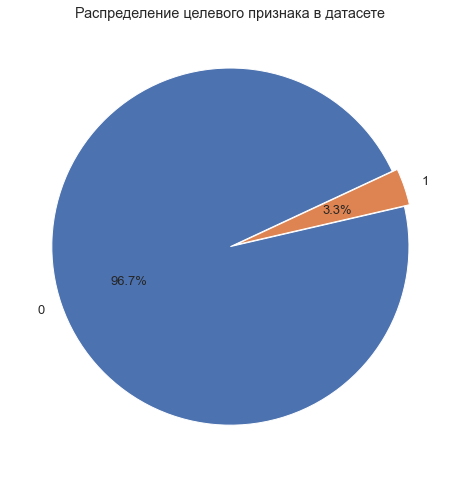

In [191]:
train_data['default'].value_counts().plot.pie(figsize=(8,14), 
                                               explode=(0, 0.03), 
                                               startangle=25, 
                                               autopct='%.1f%%', 
                                               labels=['0','1'], 
                                               fontsize=13)
plt.ylabel('')
plt.title('Распределение целевого признака в датасете')
plt.show()

Набор данных является несбалансированным. "Нулей" в данных значительно больше.

## Вывод

В данных большое количество признаков, а это может навредить алгоритму. Время обучения будет высоким, но это не показатель качества. В итоге алгоритм может переобучиться.  Также были найдены пропуски, которые также будут мешать в обучении. 

Далее в модуле предобработки мы избавимся от лишних признаков и от пропусков.

# Предобработка

Для улучшения классификации данных я удаляю те данные, дисперсия которых не превышает 0.7. Это увеличит скорость работы алгоритма и поможет избежать переобучения.

In [16]:
y_train = train_data['default'].reset_index(drop=True)

In [17]:
selector  = VarianceThreshold(.7)
selector.fit(train_data.drop('default', axis=1))
train_data = pd.DataFrame(selector.transform(train_data.drop('default', axis=1)), columns=selector.get_support(indices=True))
train_data = pd.concat([train_data, y_train], axis=1)
train_data.head()

,0,2,3,5,6,7,8,9,11,12,13,14,15,16,17,23,30,31,33,37,38,39,66,70,71,74,75,76,77,78,79,80,81,82,83,85,86,87,88,89,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,110,111,112,113,114,115,116,117,118,119,120,124,125,126,127,default
0,9.0,0.0,22.0,500000.0,75.0,75.0,3262.0,9.0,320500.0,3.0,3.0,5.0,7.0,8.0,11.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,1.0,10.0,24.0,17.0,7.0,12.0,4269811.0,177908.0,119009.0,3.0,3.0,3.0,4.0,5.0,5.0,0.0,1.0,1.0,1.0,2.0,423.0,1826.0,60.0,19.0,3262.0,19.0,0.0,0.0,0.0,0.0,430.0,333.0,5.0,3.0,0.0,0.0,0.0,61.0,40.0,2.0,1.0,0.0,0.0,13.0,1096.0,0.0
1,9.0,5.0,13.0,29983.0,22.0,22.0,2189.0,6.0,884426.0,1.0,3.0,7.0,17.0,26.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,4.0,11.0,7.0,4.0,5.0,491955.0,49195.0,37565.0,2.0,0.0,1.0,3.0,5.0,7.0,0.0,2.0,2.0,3.0,4.0,236.0,367.0,0.0,161.0,1459.0,247.0,0.0,0.0,0.0,0.0,147.0,123.0,3.0,2.0,0.0,0.0,0.0,53.0,46.0,0.0,0.0,1.0,0.0,3.0,123.0,0.0
2,9.0,0.0,15.0,730000.0,16.0,16.0,2863.0,8.0,208000.0,2.0,4.0,5.0,5.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,5.0,9.0,7.0,2.0,6.0,2272589.0,252509.0,171798.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,538.0,979.0,98.0,455.0,2860.0,1667.0,0.0,0.0,0.0,0.0,201.0,167.0,6.0,2.0,0.0,0.0,0.0,24.0,16.0,0.0,0.0,0.0,0.0,5.0,1826.0,0.0
3,7.0,0.0,8.0,0.0,68.0,68.0,6.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,498.0,1.0
4,1.0,0.0,22.0,901484.0,63.0,63.0,3708.0,10.0,1635500.0,8.0,15.0,15.0,17.0,23.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,15.0,0.0,2.0,7.0,23.0,20.0,3.0,20.0,1826926.0,83042.0,75247.0,3.0,2.0,2.0,4.0,8.0,11.0,1.0,2.0,4.0,7.0,9.0,283.0,993.0,31.0,23.0,3701.0,0.0,0.0,0.0,0.0,0.0,229.0,192.0,2.0,2.0,0.0,0.0,0.0,42.0,35.0,1.0,1.0,0.0,0.0,16.0,182.0,0.0


В данных присутсвуют пропуски. Так как в далее я использую *RandomForestClassifier*, то я предлагаю заполнить их средним. 

In [18]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(train_data.drop('default', axis=1))
train_data = pd.DataFrame(imp.transform(train_data.drop('default', axis=1)), columns=selector.get_support(indices=True))
train_data = pd.concat([train_data, y_train], axis=1)

Удалим лишние признаки и заполним пропуски в тестовом датасете.

In [19]:
test_data = pd.DataFrame(selector.transform(test_data))
test_data = pd.DataFrame(imp.transform(test_data), columns=selector.get_support(indices=True))
y_test=y_test.reset_index(drop=True)
test_data.head()

,0,2,3,5,6,7,8,9,11,12,13,14,15,16,17,23,30,31,33,37,38,39,66,70,71,74,75,76,77,78,79,80,81,82,83,85,86,87,88,89,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,110,111,112,113,114,115,116,117,118,119,120,124,125,126,127
0,9.0,0.0,19.0,29748.0,54.0,54.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,2.0,42185.0,14061.0,14061.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,302.0,300.0,4464.0,5049.0,0.0,0.0,0.0,0.0,0.0,33.0,19.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0
1,9.0,3.0,1.0,3000000.0,74.0,74.0,1147.0,3.0,19961974.0,10.0,15.0,16.0,18.0,24.0,37.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,4.0,7.0,4.0,12.0,10.0,2.0,8.0,11910983.0,992581.0,872098.0,4.0,3.0,4.0,7.0,8.0,11.0,2.0,5.0,8.0,9.0,10.0,262.0,543.0,39.0,17.0,1134.0,52.0,0.0,0.0,0.0,0.0,105.0,98.0,0.0,0.0,0.0,0.0,0.0,32.0,29.0,0.0,0.0,0.0,0.0,6.0,1825.0
2,9.0,1.0,6.0,40999.0,13.0,13.0,2944.0,8.0,100000.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,150000.0,150000.0,150000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,897.0,897.0,897.0,2939.0,2939.0,0.0,0.0,0.0,0.0,0.0,37.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,731.0
3,9.0,0.0,19.0,5267.0,11.0,11.0,926.0,3.0,504947.0,8.0,8.0,8.0,18.0,18.0,18.0,0.0,3.0,3.0,0.0,1.0,4.0,4.0,8.0,8.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,28791.0,28791.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251.0,251.0,0.0,0.0,0.0,0.0,0.0,14.0,8.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,365.0
4,7.0,3.0,8.0,144000.0,78.0,5.0,708.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,339.0


Разделим данные на **тренировочную** и **валидационную** выборки и выделим целевой признак.

In [20]:
train, valid = train_test_split(train_data, test_size=0.25, random_state=11)
train_y = train['default']
train_x = train.drop('default', axis=1)
valid_y = valid['default']
valid_x = valid.drop('default', axis=1)

In [21]:
train_x.shape

(22505, 70)

In [22]:
valid_x.shape

(7502, 70)

In [23]:
train_x.head()

,0,2,3,5,6,7,8,9,11,12,13,14,15,16,17,23,30,31,33,37,38,39,66,70,71,74,75,76,77,78,79,80,81,82,83,85,86,87,88,89,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,110,111,112,113,114,115,116,117,118,119,120,124,125,126,127
22721,9.0,0.0,29.0,2000000.0,14.0,14.0,3045.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,5000000.0,5000000.0,5000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,83.0,83.0,1706.0,1706.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,899.0
10580,7.0,3.0,18.0,10700.0,63.0,63.0,1564.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,2.0,1.0,21528.0,10764.0,6787.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,330.0,330.0,330.0,215.0,1915.0,0.0,0.0,0.0,0.0,0.0,28.0,18.0,0.0,0.0,0.0,0.0,0.0,16.0,7.0,0.0,0.0,0.0,0.0,1.0,29659.0
24729,7.0,5.0,20.0,0.0,75.0,75.0,1702.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0,238372.0,119186.0,119186.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,698.0,1096.0,300.0,1702.0,2653.0,0.0,0.0,0.0,0.0,0.0,49.0,44.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,365.0
16553,9.0,3.0,25.0,254555.0,77.0,77.0,3321.0,7.0,2979892.0,5.0,9.0,10.0,16.0,22.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,9.0,0.0,0.0,10.0,18.0,12.0,6.0,12.0,2405516.0,141500.0,102467.0,3.0,3.0,3.0,4.0,6.0,8.0,1.0,1.0,2.0,3.0,4.0,218.0,505.0,62.0,73.0,4438.0,73.0,0.0,0.0,0.0,0.0,161.0,114.0,1.0,1.0,0.0,0.0,0.0,44.0,38.0,0.0,0.0,0.0,0.0,9.0,1.0
3776,9.0,1.0,16.0,92983.0,77.0,77.0,2097.0,6.0,60360.0,1.0,1.0,2.0,2.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,81203.0,40601.0,64203.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,366.0,366.0,366.0,22.0,367.0,22.0,0.0,0.0,0.0,0.0,15.0,13.0,0.0,0.0,0.0,0.0,0.0,14.0,13.0,0.0,0.0,0.0,0.0,1.0,1096.0


In [24]:
valid_x.head()

,0,2,3,5,6,7,8,9,11,12,13,14,15,16,17,23,30,31,33,37,38,39,66,70,71,74,75,76,77,78,79,80,81,82,83,85,86,87,88,89,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,110,111,112,113,114,115,116,117,118,119,120,124,125,126,127
14704,9.0,1.0,30.0,200384.0,5.000000,5.000000,2832.0,8.0,3444083.0,0.0,0.0,5.0,5.0,5.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,16.0,14.0,2.0,10.0,1752147.0,116809.0,118010.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,517.0,1870.0,120.0,1006.0,2831.0,1006.0,0.0,0.0,0.0,0.0,384.0,232.0,82.0,7.0,3.0,3.0,3.0,36.0,1.0,29.0,3.0,2.0,526.0,9.0,3650.0
25940,9.0,0.0,22.0,68511.0,50.000000,50.000000,198.0,1.0,940000.0,1.0,2.0,2.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,40000.0,40000.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,729.0
25138,9.0,3.0,25.0,16589.0,61.000000,61.000000,1457.0,4.0,0.0,1.0,1.0,1.0,3.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,8.0,3.0,5.0,2.0,804368.0,134061.0,83559.0,3.0,1.0,2.0,3.0,5.0,5.0,0.0,0.0,1.0,1.0,1.0,232.0,344.0,120.0,8.0,2228.0,8.0,0.0,0.0,0.0,0.0,70.0,47.0,1.0,1.0,0.0,0.0,0.0,46.0,26.0,1.0,1.0,1.0,0.0,1.0,305.0
359,9.0,3.0,18.0,5700.0,27.000000,25.000000,2518.0,7.0,711630.0,0.0,1.0,1.0,2.0,12.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0,13.0,10.0,3.0,7.0,1650935.0,137577.0,103354.0,2.0,0.0,1.0,1.0,5.0,8.0,0.0,0.0,0.0,4.0,6.0,292.0,1168.0,34.0,97.0,2911.0,97.0,0.0,0.0,0.0,0.0,181.0,123.0,29.0,5.0,1.0,0.0,0.0,43.0,37.0,1.0,1.0,1.0,0.0,5.0,88.0
3525,7.0,5.0,13.0,112964.0,46.050036,45.760841,3157.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,5.0,5.0,0.0,5.0,55928.0,13982.0,13982.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,334.0,63.0,2694.0,4941.0,0.0,0.0,0.0,0.0,0.0,77.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,29664.0


## Вывод

Данные были предобработаны и подготовлены к обучению. Были удалены лишние признаки и заполнены пропуски. Также было проведено разделение на тренировочную и валидаионную выборки.

# Обучение модели

Обучим модель случайного леса на тренировочных данных.

In [207]:
rf_model = RandomForestClassifier(n_estimators=250, max_depth=20, n_jobs=-1, random_state=1)

In [208]:
rf_model.fit(train_x, train_y)

RandomForestClassifier(max_depth=20, n_estimators=250, n_jobs=-1,
                       random_state=1)

In [209]:
pred_rf = rf_model.predict(valid_x)

Расчитаем **roc_auc** для валидационной выборки для находения **gini**. Gini расчитывается так: $gini\_score = 2 * roc\_auc - 1$.

In [210]:
roc_auc_valid = roc_auc_score(pred_rf, valid_y)
roc_auc_valid

0.9165106951871658

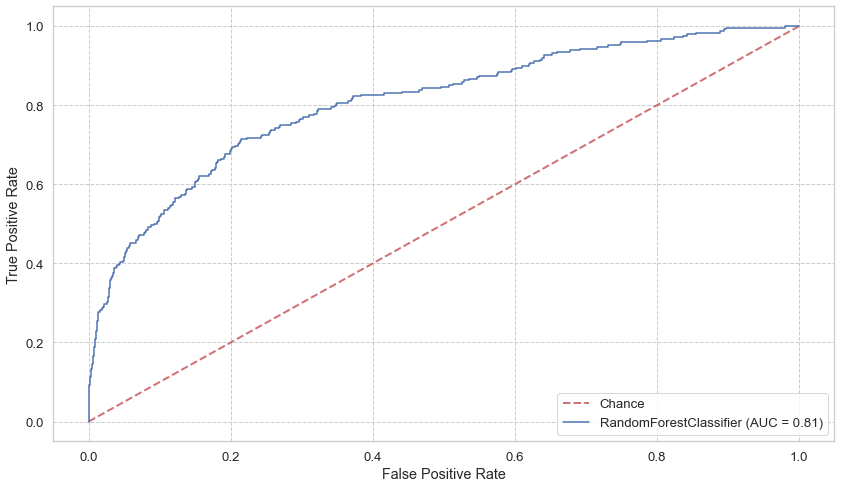

In [211]:
f,ax = plt.subplots(figsize=(14,8))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
plot_roc_curve(rf_model, valid_x, valid_y, ax=ax)

In [212]:
gini_score = roc_auc_valid * 2 - 1
gini_score

0.8330213903743315

In [213]:
confusion_matrix(valid_y, pred_rf)

array([[7251,    3],
       [ 229,   19]], dtype=int64)

Получились хорошие значения метрик, однако это не показатель. если посмотреть на **confusion_matrix**, то можно заметить как алгоритм практически не обнаруживает дефолт. Для того чтобы решить эту проблему, я предлагаю сдвинуть границу предсказания целевого признака.

In [214]:
pred_proba_rf = rf_model.predict_proba(valid_x)

In [215]:
for limit in np.arange(.8,.9,.005):
    list=[]
    for prob in pred_proba_rf:
        if prob[0] > limit:
            list.append(0)
        else:
            list.append(1)
    roc_auc = roc_auc_score(list, valid_y)
    print('limit:', limit)
    print('roc_auc_score:', roc_auc)
    print('gini_score:', roc_auc * 2 - 1)
    print('confusion_matrix:')
    print(confusion_matrix(valid_y, list))
    print()

limit: 0.8
roc_auc_score: 0.6931537068058747
gini_score: 0.3863074136117495
confusion_matrix:
[[7155   99]
 [ 179   69]]

limit: 0.805
roc_auc_score: 0.6805156631322297
gini_score: 0.36103132626445933
confusion_matrix:
[[7144  110]
 [ 179   69]]

limit: 0.81
roc_auc_score: 0.6720387538869055
gini_score: 0.34407750777381096
confusion_matrix:
[[7134  120]
 [ 178   70]]

limit: 0.8150000000000001
roc_auc_score: 0.6628115584771295
gini_score: 0.32562311695425894
confusion_matrix:
[[7124  130]
 [ 178   70]]

limit: 0.8200000000000001
roc_auc_score: 0.6545250834590935
gini_score: 0.3090501669181871
confusion_matrix:
[[7112  142]
 [ 177   71]]

limit: 0.8250000000000001
roc_auc_score: 0.6501980364313744
gini_score: 0.30039607286274883
confusion_matrix:
[[7102  152]
 [ 175   73]]

limit: 0.8300000000000001
roc_auc_score: 0.6415451502685009
gini_score: 0.2830903005370018
confusion_matrix:
[[7087  167]
 [ 174   74]]

limit: 0.8350000000000001
roc_auc_score: 0.6348253968253968
gini_score: 0.26965

In [216]:
list=[]
for prob in pred_proba_rf:
        if prob[0] > .8:
            list.append(0)
        else:
            list.append(1)
valid_prediction = pd.Series(list)

In [217]:
roc_auc_valid = roc_auc_score(valid_prediction, valid_y)
roc_auc_valid

0.6931537068058747

In [218]:
gini_score = roc_auc_valid * 2 - 1
gini_score

0.3863074136117495

In [219]:
confusion_matrix(valid_y, valid_prediction)

array([[7155,   99],
       [ 179,   69]], dtype=int64)

В результате преобразования у меня получилось увеличить количество обнаруженных дефолтов, жертвуя общей точностью модели.

## Вывод

In [232]:
print('gini =', gini_score)

gini = 0.20343998717233225


Хоть в результате сдвига границы и ухудшилась метрика gini, однако количество обнаруженнного дефолта выросло. Я считаю это гораздо важней хороших цифр на метриках.

# Тестирование

Протестируем нашу модель на тестовых данных.

In [222]:
rf_model.fit(pd.concat([train_x, valid_x]), pd.concat([train_y,valid_y]))

RandomForestClassifier(max_depth=20, n_estimators=250, n_jobs=-1,
                       random_state=1)

In [223]:
pred_rf = rf_model.predict(test_data)

In [224]:
pred_proba_rf = rf_model.predict_proba(test_data)

In [225]:
list=[]
for prob in pred_proba_rf:
        if prob[0] > .8:
            list.append(0)
        else:
            list.append(1)
test_prediction = pd.Series(list)

In [226]:
roc_auc_test = roc_auc_score(y_test, test_prediction)
roc_auc_test

0.6017199935861661

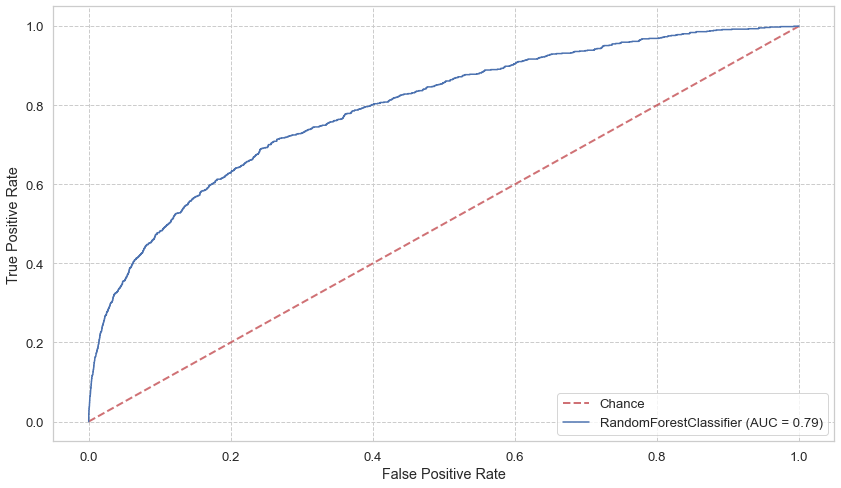

In [227]:
f,ax = plt.subplots(figsize=(14,8))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
plot_roc_curve(rf_model, test_data, y_test, ax=ax)

In [228]:
gini_score = roc_auc_test * 2 - 1
gini_score

0.20343998717233225

In [229]:
confusion_matrix(y_test, test_prediction)

array([[28585,   470],
       [  732,   206]], dtype=int64)

## Вывод

In [231]:
print('gini =', gini_score)

gini = 0.20343998717233225


Обучив данные на всей тренировочной выборке и проверив на тестовой, мне удалось достигнуть результата метрики gini = 0.2 и предсказывать дефолт с точностью 22%. 

# Общий вывод

Объясним результаты модели, для этого расчитаем важность признаков.

In [204]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

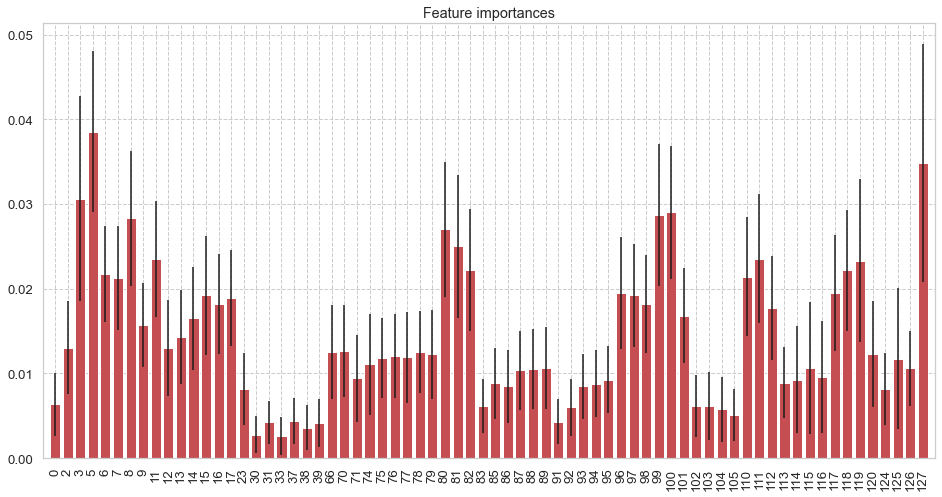

In [238]:
plt.figure(figsize=(16,8))
plt.title("Feature importances")
plt.bar(range(train_x.dropna().shape[1]), importances,
        color="r", yerr=std, align="center")
plt.xticks(range(train_x.dropna().shape[1]), train_x.columns, rotation='vertical')
plt.xlim([-1, train_x.dropna().shape[1]])
plt.show()

На графике можно увидеть, что **наибольший вклад в предсказания привносят признаки 5, 127, 3, 100 и 99**. Если бы я знал, что за данные за ними скрываются, я бы смог сделать выводы, какие данные о человеке влияют сильнее всего на вероятность дефолта:)

В моей работе была выбрана модель случайного леса, так как она достаточно легко интерпретируется. Выше я описал какие признаки самые "важные" в предсказании.

Для улучшения класификации данных я предлагаю:
 - собрать больше данных;
 - испоьзовать более сложные модели, однако, вероятно, это понизит инерпретируемость;
 - выбрать другой набор данных, который является наиболее репрезентативным.
